<a href="https://colab.research.google.com/github/Cinco33/Data_Science_Portfolio/blob/main/Senators_Nobles_Darius.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving houseOfReps 2.csv to houseOfReps 2 (1).csv
Saving stateToCode 2.csv to stateToCode 2 (1).csv
Saving senators 2.csv to senators 2 (1).csv
Saving houseOfReps 2 - Copy.csv to houseOfReps 2 - Copy.csv


In [35]:
import pandas as pd

senators = pd.read_csv('senators 2.csv')
house = pd.read_csv('houseOfReps 2.csv')
state_codes = pd.read_csv('stateToCode 2.csv')

print(senators.head())
print(house.head())
print(state_codes.head())


                 Name        State  Age
0       Tammy Baldwin    Wisconsin   61
1       John Barrasso      Wyoming   71
2    Marsha Blackburn    Tennessee   71
3  Richard Blumenthal  Connecticut   78
4           Roy Blunt     Missouri   72
  District                   Name  Age
0    CA-31    Grace F. Napolitano   86
1    DC-AL  Eleanor Holmes Norton   85
2    KY-05          Harold Rogers   85
3    NJ-09      Bill Pascrell Jr.   85
4    CA-43          Maxine Waters   84
   State Name Abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA


In [39]:
senators_df = senators
senators_df.head()


,Name,State,Age
0,Tammy Baldwin,Wisconsin,61
1,John Barrasso,Wyoming,71
2,Marsha Blackburn,Tennessee,71
3,Richard Blumenthal,Connecticut,78
4,Roy Blunt,Missouri,72


In [40]:
house_df = house
house_df.head()

,District,Name,Age
0,CA-31,Grace F. Napolitano,86
1,DC-AL,Eleanor Holmes Norton,85
2,KY-05,Harold Rogers,85
3,NJ-09,Bill Pascrell Jr.,85
4,CA-43,Maxine Waters,84


In [41]:
state_codes_df = state_codes
state_codes_df.head()

,State Name,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [43]:
#Merging Senator and State Code
merge_df = pd.merge(senators_df, state_codes_df, left_on='State', right_on='State Name', how="inner")
merge_df = merge_df[["Name", "Age", "State", "Abbreviation"]]
merge_df.head()

,Name,Age,State,Abbreviation
0,Tammy Baldwin,61,Wisconsin,WI
1,John Barrasso,71,Wyoming,WY
2,Marsha Blackburn,71,Tennessee,TN
3,Richard Blumenthal,78,Connecticut,CT
4,Roy Blunt,72,Missouri,MO


In [45]:
# Extract state abbreviation from 'District' column in house_df
house_df['Abbreviation'] = house_df['District'].apply(lambda x: x.split('-')[0] if '-' in x else x)

# Merge house_df with state_codes_df on Abbreviation
merged_house_df = pd.merge(
    house_df,
    state_codes_df,
    left_on='Abbreviation',
    right_on='Abbreviation',
    how="inner"
)
display(merged_house_df.head())

,District,Name,Age,Abbreviation,State Name
0,CA-31,Grace F. Napolitano,86,CA,California
1,DC-AL,Eleanor Holmes Norton,85,DC,District of Columbia
2,KY-05,Harold Rogers,85,KY,Kentucky
3,NJ-09,Bill Pascrell Jr.,85,NJ,New Jersey
4,CA-43,Maxine Waters,84,CA,California


In [47]:
# Grouping data by state/abbreviation
age_summary = merged_house_df.groupby(['Abbreviation', 'State Name']).agg({'Age': 'mean'}).reset_index()
age_summary

,Abbreviation,State Name,Age
0,AK,Alaska,49.000000
1,AL,Alabama,59.857143
2,AR,Arkansas,60.500000
3,AZ,Arizona,56.000000
4,CA,California,59.365385
5,CO,Colorado,49.500000
6,CT,Connecticut,65.400000
7,DC,District of Columbia,85.000000
8,DE,Delaware,60.000000
9,FL,Florida,54.107143


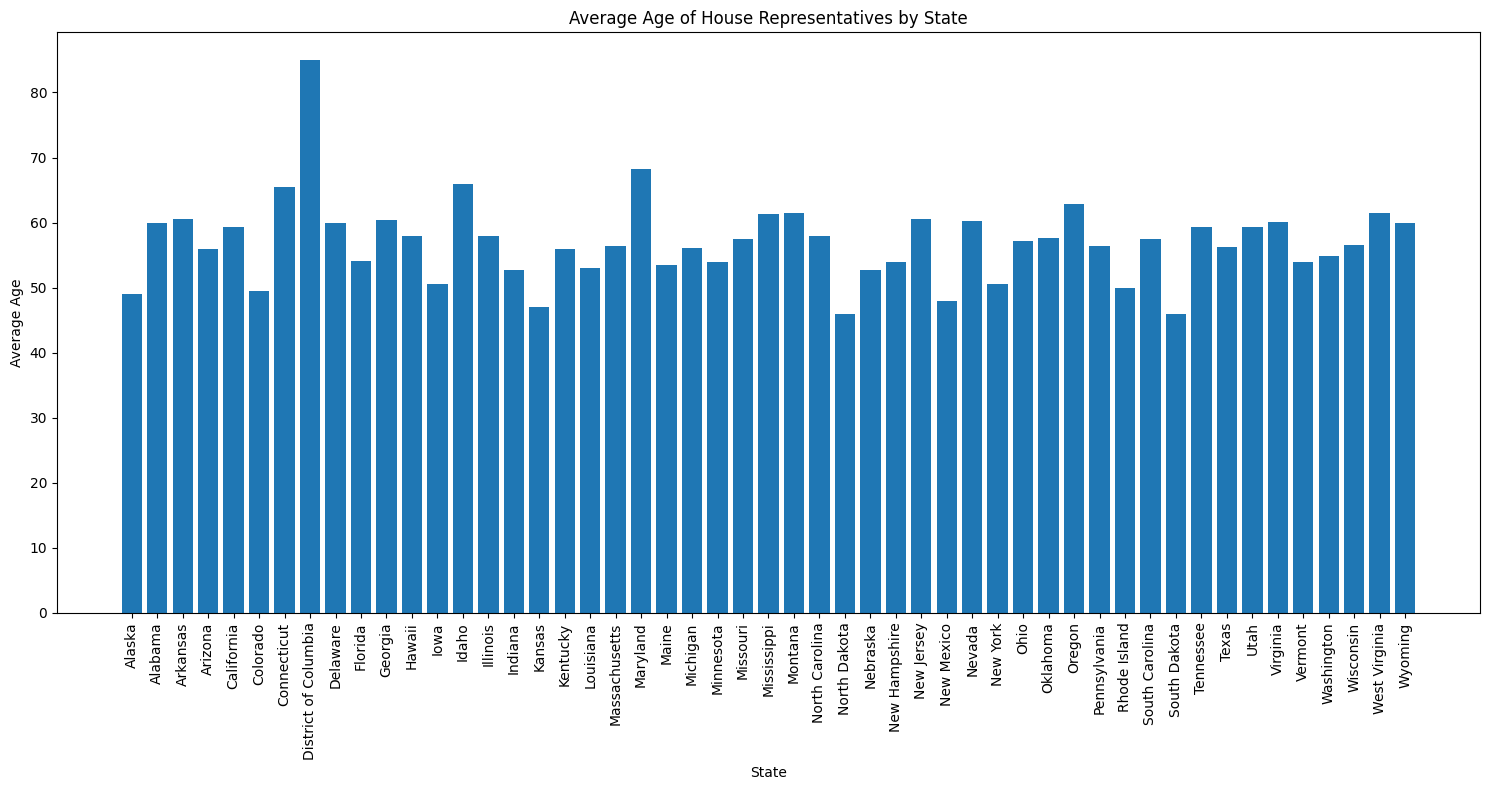

In [52]:
#Graphing plots Matplot.lib
states = age_summary['State Name']
ages = age_summary['Age']

fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(states, ages)
ax.set_title('Average Age of House Representatives by State')
ax.set_xlabel('State')
ax.set_ylabel('Average Age')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [53]:
!pip install nbconvert[webpdf]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 MB 24.5 MB/s eta 0:00:00
